## Imports

In [1]:
import xtrack as xt
import ruamel.yaml
import pickle
import numpy as np
import json
import matplotlib.pyplot as plt

# Initialize yaml reader
ryaml = ruamel.yaml.YAML()

## Load collider and elements

In [2]:
collider = xt.Multiline.from_json(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_new/base_collider/xtrack_0000/collider/collider.json"
)

# Don't build trackers yet as it will be done after dynamic closing knob is created
#collider.build_trackers()

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [3]:
# load dictionnary of elements from pickle
with open(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_new/base_collider/xtrack_0000/gen_3/dynamic_configure.pkl",
    "rb",
) as fid:
    dic_elements = pickle.load(fid)

In [4]:
l_xrange = []
d_element_attr_vals = { 'lhcb1': {}, 'lhcb2': {}}
for on_sep, d_beam in sorted(dic_elements.items()):
    l_xrange.append(on_sep)
    for beam_temp, d_bb in d_beam.items():
        for type_bb, d_elements in d_bb.items():
            for element, d_attr in d_elements.items():
                if element not in d_element_attr_vals[beam_temp]:
                    d_element_attr_vals[beam_temp][element] = {}

                for attr, val in d_attr.items():
                    if attr in d_element_attr_vals[beam_temp][element]:
                        d_element_attr_vals[beam_temp][element][attr].append(val)
                    else:
                        d_element_attr_vals[beam_temp][element][attr] = [val]

In [5]:
d_element_attr_vals["lhcb1"]["bb_lr.l5b1_25"]["other_beam_shift_y"]

[-0.0010210880370609145,
 -0.0006882542207094816,
 -0.0004547170129970918,
 -0.000300403814904707,
 -0.00019859658182067646,
 -0.0001317568963989628,
 -8.818979536639974e-05,
 -6.011460465246441e-05,
 -4.244180063827457e-05,
 -3.158032909361299e-05,
 -2.1773984303972045e-05,
 -1.0344774690498794e-05,
 -3.0929832258297944e-06,
 -5.664707557619212e-07,
 -1.1997912956841079e-07,
 -2.481844380082458e-07,
 -4.6246853768964446e-07,
 -6.423679609019895e-07,
 -7.723968818363726e-07,
 -8.615260174040459e-07,
 -9.213219022654885e-07,
 -9.610717652716225e-07,
 -9.87388889241443e-07,
 -1.0047809242901894e-06,
 -1.0162654086194354e-06,
 -1.0238452845523908e-06,
 -1.0288476009464912e-06,
 -1.03214823745177e-06,
 -1.0343262092116215e-06,
 -1.0357632125493043e-06,
 -1.0367114114830986e-06,
 -1.0373369504237973e-06,
 -1.037749492779772e-06,
 -1.0380218638378245e-06,
 -1.038201476207202e-06,
 -1.038320068807551e-06,
 -1.0383982206995679e-06,
 -1.0384500719132293e-06,
 -1.038484026435589e-06,
 -1.0385062

In [6]:
l_xrange

[-1.0,
 -0.6597715439978032,
 -0.43529849026924516,
 -0.2871975570248526,
 -0.18948477563068414,
 -0.12501666298193378,
 -0.08248243676104346,
 -0.054419564654534805,
 -0.035904480195810703,
 -0.023688754335228577,
 -0.01562916602313841,
 -0.010311678998484036,
 -0.006803352374039533,
 -0.004488658300181182,
 -0.0029614890171890938,
 -0.001953906181403385,
 -0.001289131698131363,
 -0.0008505324108926394,
 -0.0005611570819548106,
 -0.0003702354743866272,
 -0.0002442708305788242,
 -0.0001611629430446166,
 -0.00010633072376777673,
 -7.015398579466997e-05,
 -4.6285603525349354e-05,
 -3.0537924102789905e-05,
 -2.0148053335785425e-05,
 -1.3293112257901239e-05,
 -8.770417198931623e-06,
 -5.786471696844006e-06,
 -3.817749365726358e-06,
 -2.518842393621913e-06,
 -1.661860535127052e-06,
 -1.0964482911697921e-06,
 -7.234053819788456e-07,
 -4.772822858045029e-07,
 -3.148972706280381e-07,
 -2.0776025844295507e-07,
 -1.370743064942909e-07,
 -9.043772683816628e-08,
 -0.0]

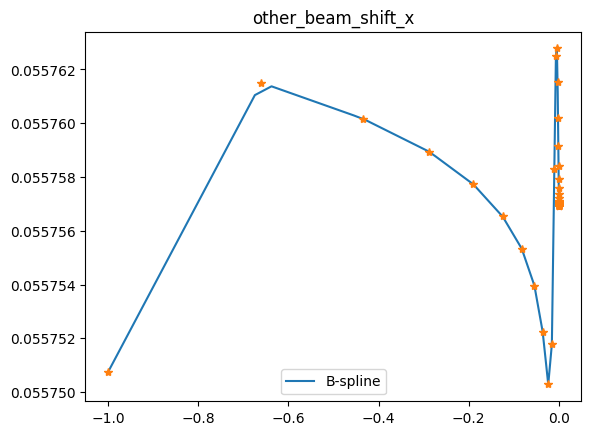

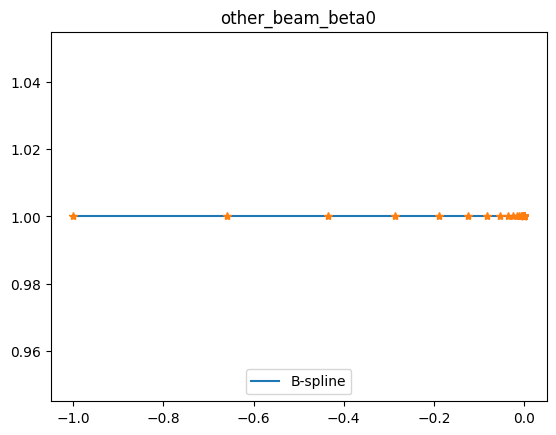

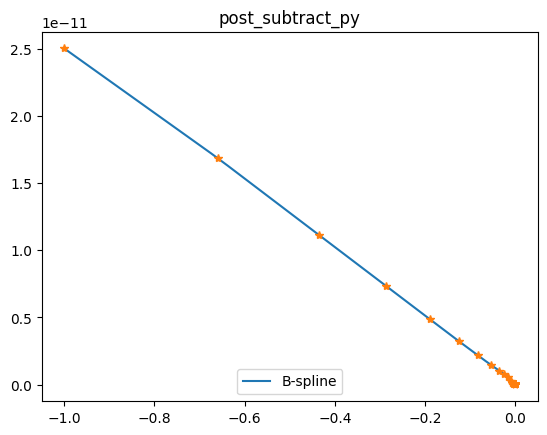

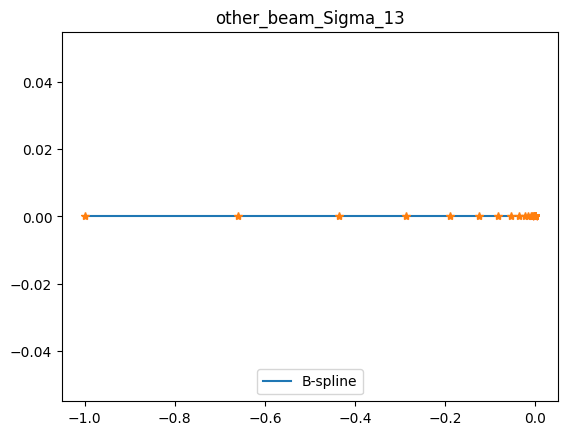

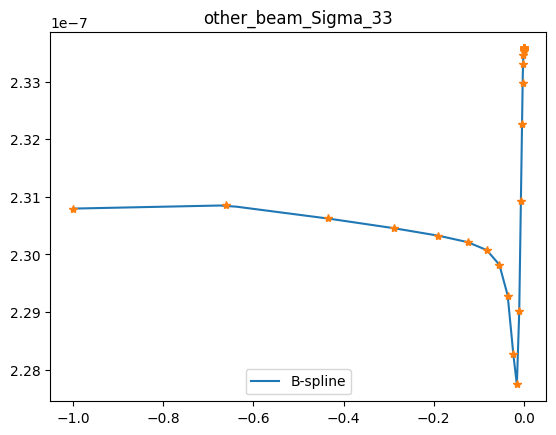

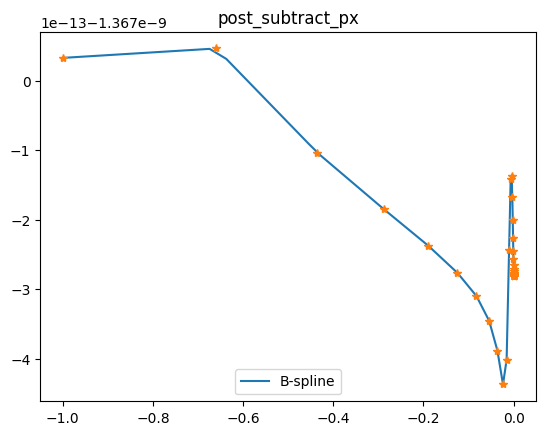

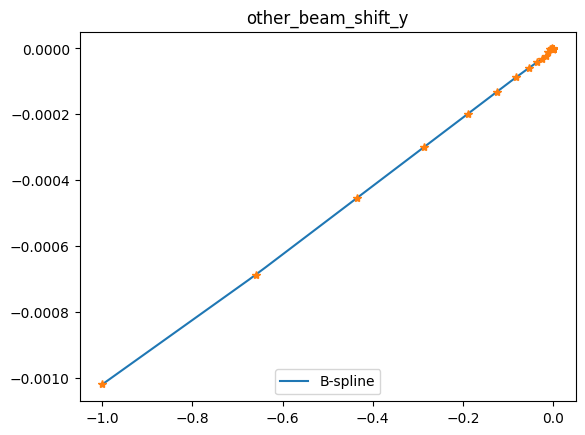

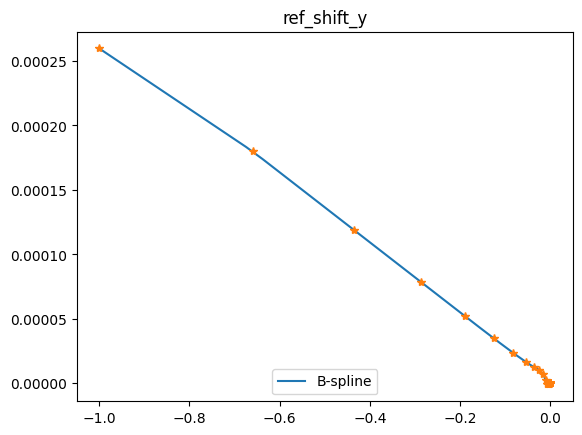

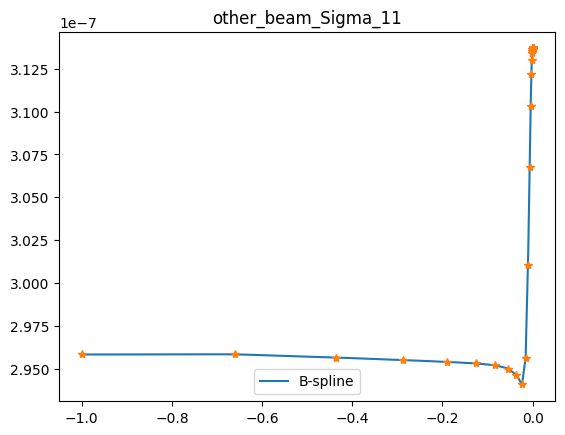

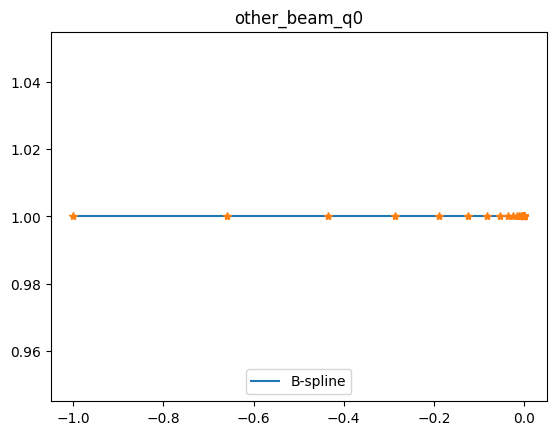

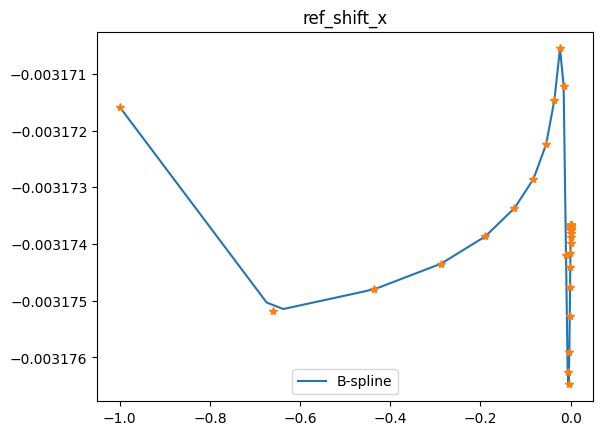

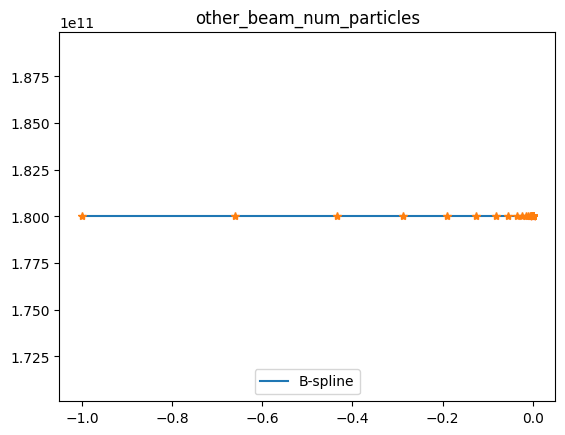

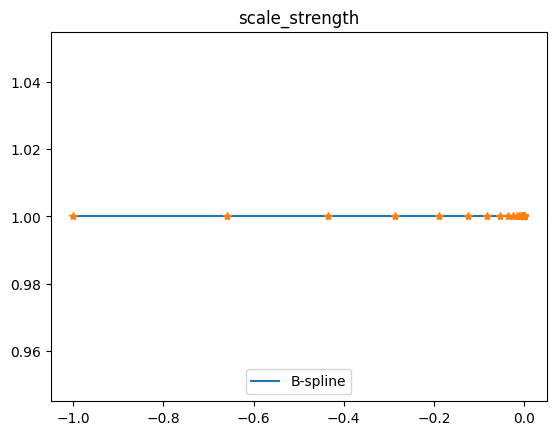

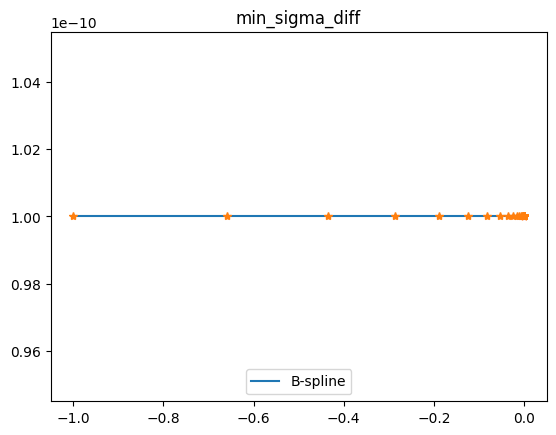

In [7]:
# Increase the sampling of l_xrange
array_xrange = -np.logspace(0, -10, 10*len(l_xrange), endpoint = True)
for attr in d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25']:

    fig, ax = plt.subplots()
    y_plot = np.interp(array_xrange, l_xrange, d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25'][attr])
    ax.plot(array_xrange, y_plot, label="B-spline")
    ax.plot(l_xrange, d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25'][attr], '*')
    ax.legend(loc="lower center")
    ax.set_title(attr)
    #ax.set_ylim(-20, 10)
    plt.show()

## Implement interpolation manually as np.interp is not compatible with xtrack

In [8]:
def interp(x, l_xrange, l_yrange):
    
    # Ensure that x is a float or int
    assert isinstance(x, float) or isinstance(x, int)
    
    # Ensure that x is always taken negative
    if x>0:
        x = -x
                
    # Do the interpolation
    for x1, x2, y1, y2 in zip(l_xrange[:-1], l_xrange[1:], l_yrange[:-1], l_yrange[1:]):
        if x1 <= x <= x2:
            return y1 + (y2 - y1) * (x - x1) / (x2 - x1)
        
    # If x is out of range, raise error
    raise ValueError("x out of range")
            
# This function is needed for closure
def make_closure_interp(l_xrange, l_yrange):
    return lambda x: interp(x, l_xrange, l_yrange)

d_element_attr_regression = {"lhcb1": {}, "lhcb2": {}}
for beam in d_element_attr_regression:
    d_element_attr_regression[beam] = {}
    for element in d_element_attr_vals[beam]:
        d_element_attr_regression[beam][element] = {}
        for attr in d_element_attr_vals[beam][element]:
            # model = {'l_xrange' : l_xrange, 'attr': d_element_attr_vals[beam][element][attr], 'attr_name': attr}
            #d_element_attr_regression[beam][element][attr] = {}
            #d_element_attr_regression[beam][element][attr]['model'] = {'l_xrange' : l_xrange, 'attr': d_element_attr_vals[beam][element][attr], 'attr_name': attr}
            #d_element_attr_regression[beam][element][attr]['fit'] = make_linear_interp(d_element_attr_regression[beam][element][attr]['model'])
            #d_element_attr_regression[beam][element][attr] = make_closure_interp(model)
            d_element_attr_regression[beam][element][attr] = make_closure_interp(l_xrange, d_element_attr_vals[beam][element][attr])


In [9]:
d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["other_beam_shift_x"](-0.3)

0.05575904099907841

In [10]:
d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["min_sigma_diff"](-0.3)

1e-10

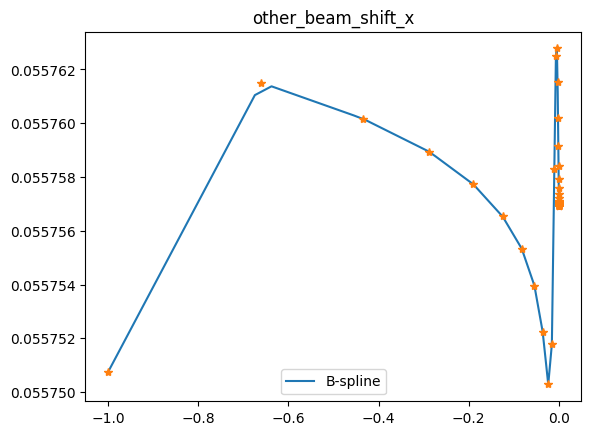

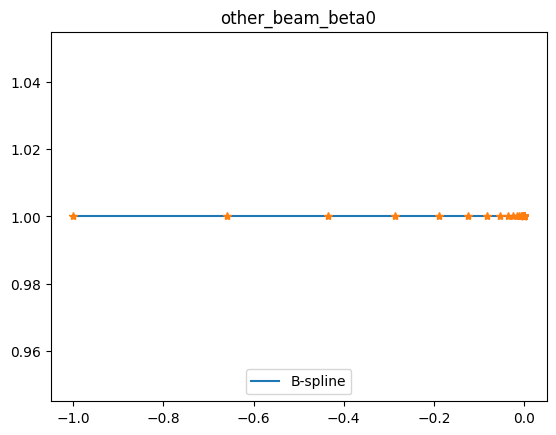

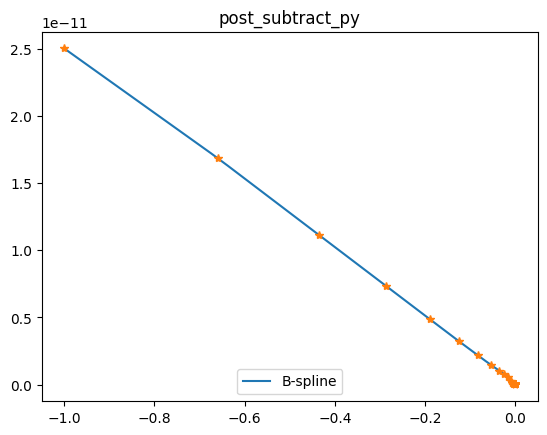

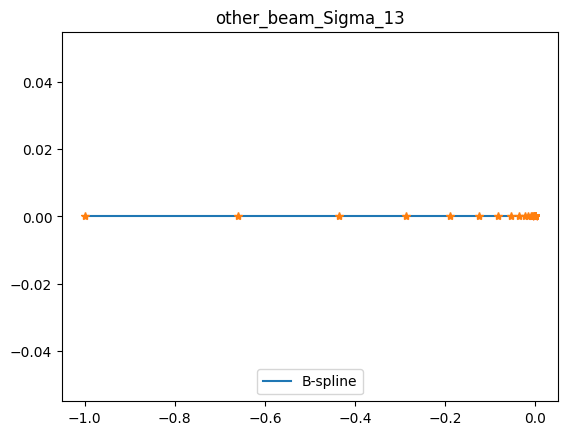

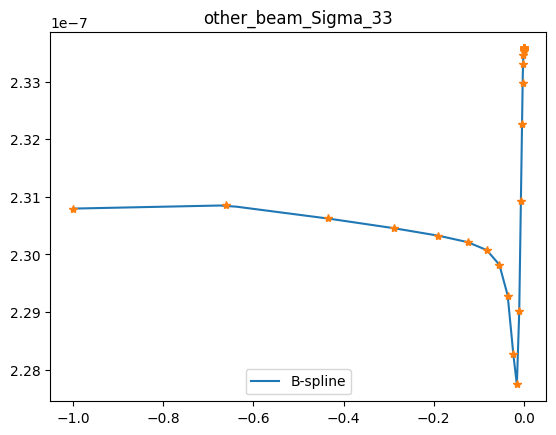

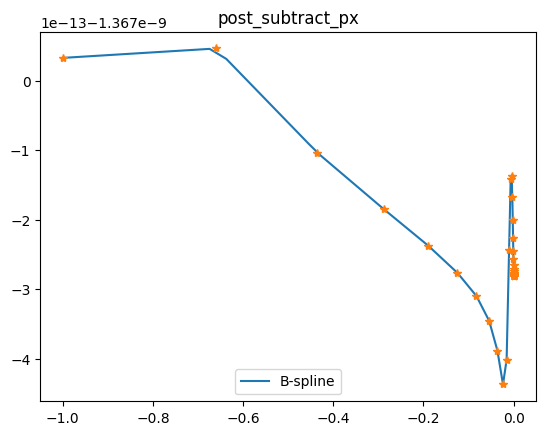

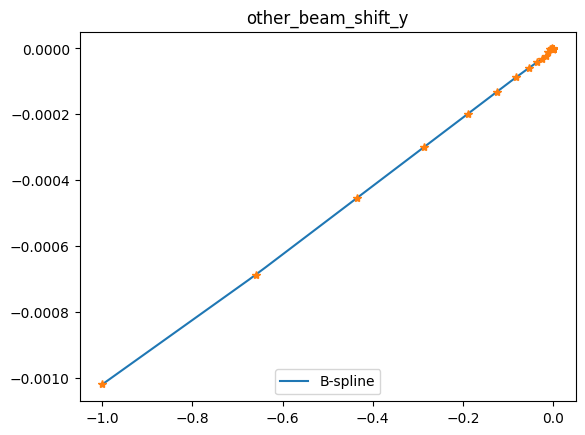

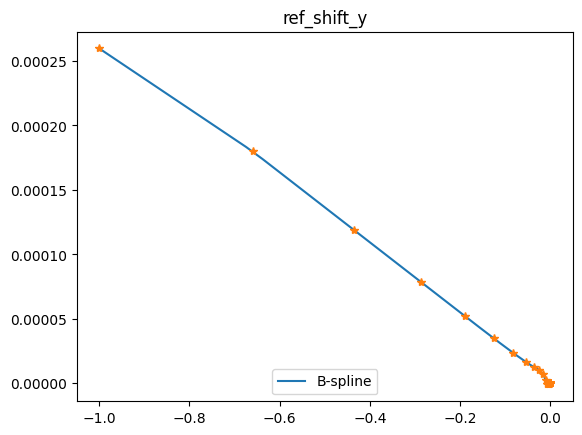

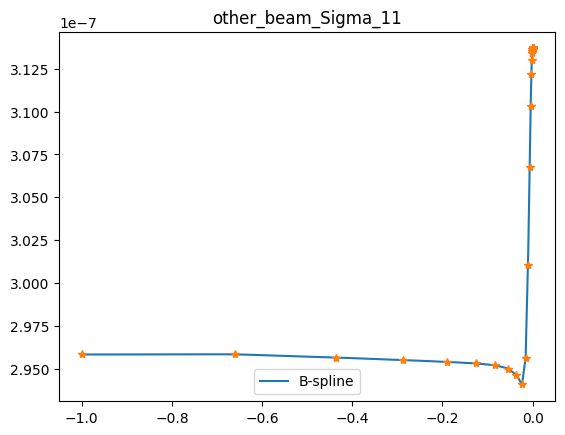

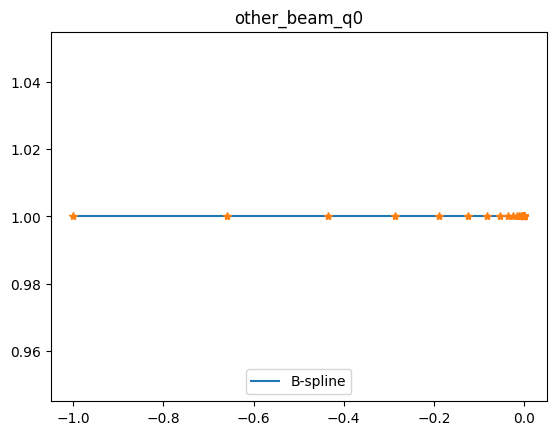

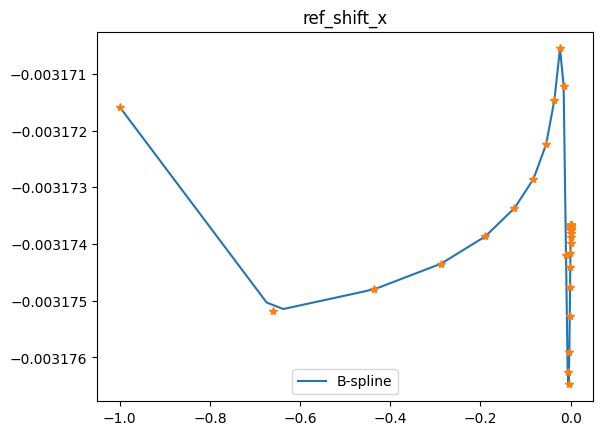

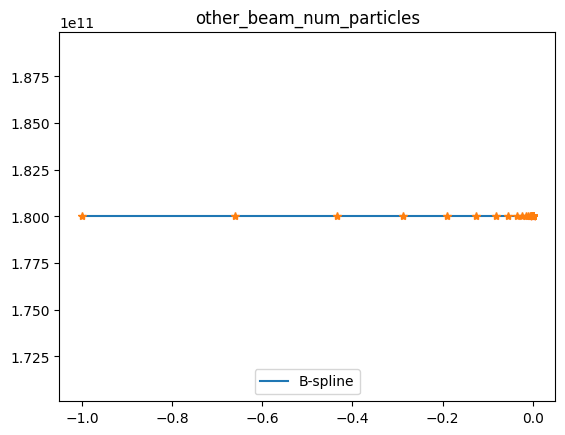

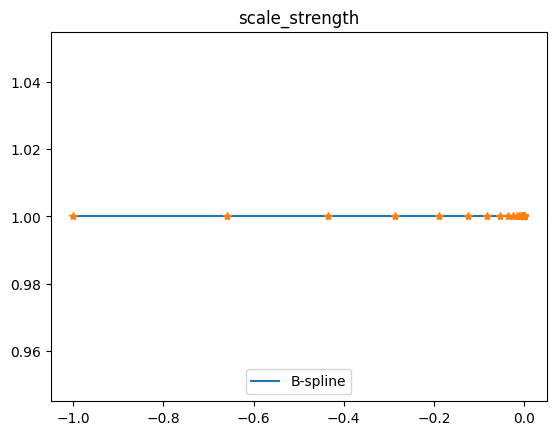

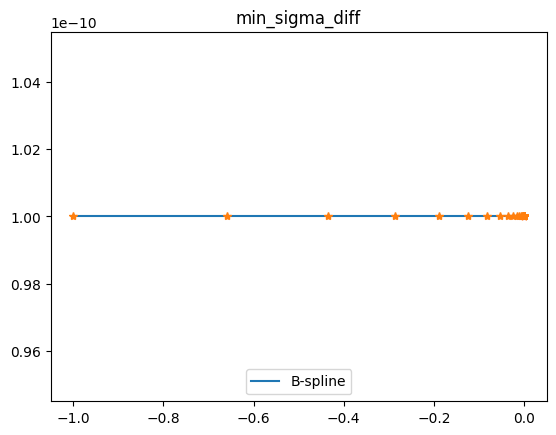

In [11]:
# Increase the sampling of l_xrange
array_xrange = -np.logspace(0, -10, 10*len(l_xrange), endpoint = True)

beam = "lhcb1"
element = "bb_lr.l5b1_25"
for attr in d_element_attr_vals[beam][element]:
    #print("starting", attr)
    y_plot = []
    for sep in array_xrange:
        y_plot.append(d_element_attr_regression[beam][element][attr](sep))

    fig, ax = plt.subplots()
    ax.plot(array_xrange, y_plot, label="B-spline")
    ax.plot(l_xrange, d_element_attr_vals[beam][element][attr], '*')
    ax.legend(loc="lower center")
    ax.set_title(attr)
    #ax.set_ylim(-20, 10)
    plt.show()


## Create dynamic knob

In [12]:
# Create knob for beam-beam in collider
for beam in d_element_attr_regression:
    for element in d_element_attr_regression[beam]:
        if 'l1' or 'r1' in element:
            sep = 'on_sep1'
        elif 'l5' or 'r5' in element:
            sep = 'on_sep5'
        else:
            continue
        for attr in d_element_attr_regression[beam][element]:
            collider[beam].vars[f'interp_{element}_{attr}'] = d_element_attr_regression[beam][element][attr]
            if (
                isinstance(getattr(collider[beam][element], attr), list)
                or isinstance(getattr(collider[beam][element], attr), np.ndarray)
            ):
                setattr(collider[beam].element_refs[element],attr[0], collider[beam].vars[f'interp_{element}_{attr}'](collider.vars[sep]))  
            else:
                setattr(collider[beam].element_refs[element],attr, collider[beam].vars[f'interp_{element}_{attr}'](collider.vars[sep]))  

In [13]:
d_element_attr_regression['lhcb1']["bb_lr.l5b1_25"]["other_beam_shift_x"](-0.3)

0.05575904099907841

In [14]:
sep = 0.3
collider.vars['on_sep1'] = -sep
collider.vars['on_sep5'] = sep
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_x._get_value()
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_x._info()

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x._get_value()
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x = 0.05575904099907841

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x._expr
   eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x = vars['interp_bb_lr.l5b1_25_other_beam_shift_x'](vars['on_sep1'])

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x._expr._get_dependencies()
   vars['on_sep1'] = -0.3
   vars['interp_bb_lr.l5b1_25_other_beam_shift_x'] = <function make_closure_interp.<locals>.<lambda> at 0x7f437371ea70>

#  eref['lhcb1']['bb_lr.l5b1_25'].other_beam_shift_x does not influence any target



In [15]:
collider.vars['on_sep1']._value

-0.3

In [16]:
sep = 0.3
collider.vars['on_sep1'] = -sep
collider.vars['on_sep5'] = sep
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_x._get_value()

0.05575904099907841

In [17]:
sep = 0.0003
collider.vars['on_sep1'] = -sep
collider.vars['on_sep5'] = sep
collider.lhcb1.element_refs["bb_lr.l5b1_25"].other_beam_shift_y._get_value()

-8.948670582918335e-07

## Ensure that the piecewise linear interpolation in the collider is correct

starting other_beam_shift_x
Elapsed time: 4.315376281738281e-05
Elapsed time: 3.933906555175781e-05
Elapsed time: 6.985664367675781e-05
Elapsed time: 3.3855438232421875e-05
Elapsed time: 4.220008850097656e-05
Elapsed time: 3.933906555175781e-05
Elapsed time: 3.62396240234375e-05
Elapsed time: 3.647804260253906e-05
Elapsed time: 3.4809112548828125e-05
Elapsed time: 3.4809112548828125e-05
Elapsed time: 3.2901763916015625e-05
Elapsed time: 3.504753112792969e-05
Elapsed time: 3.409385681152344e-05
Elapsed time: 3.409385681152344e-05
Elapsed time: 3.409385681152344e-05
Elapsed time: 3.457069396972656e-05
Elapsed time: 4.267692565917969e-05
Elapsed time: 4.100799560546875e-05
Elapsed time: 3.528594970703125e-05
Elapsed time: 3.528594970703125e-05
Elapsed time: 3.266334533691406e-05
Elapsed time: 3.62396240234375e-05
Elapsed time: 4.172325134277344e-05
Elapsed time: 3.981590270996094e-05
Elapsed time: 3.6716461181640625e-05
Elapsed time: 4.506111145019531e-05
Elapsed time: 3.4332275390625e-05

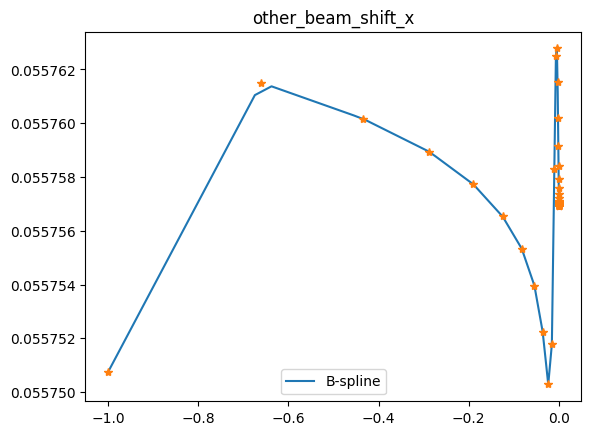

In [24]:
# Increase the sampling of l_xrange
array_xrange = -np.logspace(0, -10, 10*len(l_xrange), endpoint = True)

import time
for attr in d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25']:
    print("starting", attr)
    y_plot = []
    for sep in array_xrange:
        a = time.time()
        collider.vars['on_sep1'] = -sep
        collider.vars['on_sep5'] = sep
        y_plot.append(getattr(collider.lhcb1.element_refs["bb_lr.l5b1_25"], attr)._get_value())
        b = time.time()
        print("Elapsed time:", b-a)

    fig, ax = plt.subplots()
    ax.plot(array_xrange, y_plot, label="B-spline")
    ax.plot(l_xrange, d_element_attr_vals["lhcb1"]['bb_lr.l5b1_25'][attr], '*')
    ax.legend(loc="lower center")
    ax.set_title(attr)
    #ax.set_ylim(-20, 10)
    plt.show()
    break

## Ensure that the dynamic kbob delivers the same results at xsuite reconfiguration

In [25]:
collider.build_trackers()

Compiling ContextCpu kernels...


40159148bc78496eacca0a2310d5ee3b.c:5035: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 40159148bc78496eacca0a2310d5ee3b.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
40159148bc78496eacca0a2310d5ee3b.c: In function ‘compt_do’:
40159148bc78496eacca0a2310d5ee3b.c:18160:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
40159148bc78496eacca0a2310d5ee3b.c:18157:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
401591

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


f6e006cb55eb4130b230f285b62b74d6.c:5035: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from f6e006cb55eb4130b230f285b62b74d6.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
f6e006cb55eb4130b230f285b62b74d6.c: In function ‘compt_do’:
f6e006cb55eb4130b230f285b62b74d6.c:18160:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
f6e006cb55eb4130b230f285b62b74d6.c:18157:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
f6e006

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [26]:
def configure_beam_beam(collider, config_bb):
    collider.configure_beambeam_interactions(
        num_particles=config_bb["num_particles_per_bunch"],
        nemitt_x=config_bb["nemitt_x"],
        nemitt_y=config_bb["nemitt_y"],
    )

    # Configure filling scheme mask and bunch numbers
    if "mask_with_filling_pattern" in config_bb:
        # Initialize filling pattern with empty values
        filling_pattern_cw = None
        filling_pattern_acw = None

        # Initialize bunch numbers with empty values
        i_bunch_cw = None
        i_bunch_acw = None

        if "pattern_fname" in config_bb["mask_with_filling_pattern"]:
            # Fill values if possible
            if config_bb["mask_with_filling_pattern"]["pattern_fname"] is not None:
                fname = "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/master_jobs/filling_scheme/25ns_2464b_2452_1842_1821_236bpi_12inj_hybrid_converted.json"  # config_bb["mask_with_filling_pattern"]["pattern_fname"]
                with open(fname, "r") as fid:
                    filling = json.load(fid)
                filling_pattern_cw = filling["beam1"]
                filling_pattern_acw = filling["beam2"]

                # Only track bunch number if a filling pattern has been provided
                if "i_bunch_b1" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_cw = 411
                if "i_bunch_b2" in config_bb["mask_with_filling_pattern"]:
                    i_bunch_acw = 410

                # Note that a bunch number must be provided if a filling pattern is provided
                # Apply filling pattern
                collider.apply_filling_pattern(
                    filling_pattern_cw=filling_pattern_cw,
                    filling_pattern_acw=filling_pattern_acw,
                    i_bunch_cw=i_bunch_cw,
                    i_bunch_acw=i_bunch_acw,
                )

    return collider


# Read configuration for simulations
with open(
    "/afs/cern.ch/work/c/cdroin/private/example_DA_study/master_study/scans/dynamic_collapse_new/base_collider/xtrack_0000/gen_3/gen_4/gen_5_debug/config.yaml",
    "r",
) as fid:
    config = ryaml.load(fid)

config_bb = config["config_collider"]["config_beambeam"]
#collider = configure_beam_beam(collider, config_bb)

Compiling ContextCpu kernels...


b6294fda482147f68c01b5829fe6690c.c:5040: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from b6294fda482147f68c01b5829fe6690c.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
b6294fda482147f68c01b5829fe6690c.c: In function ‘compt_do’:
b6294fda482147f68c01b5829fe6690c.c:18165:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
b6294fda482147f68c01b5829fe6690c.c:18162:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
b6294f

Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Done computing footprint.


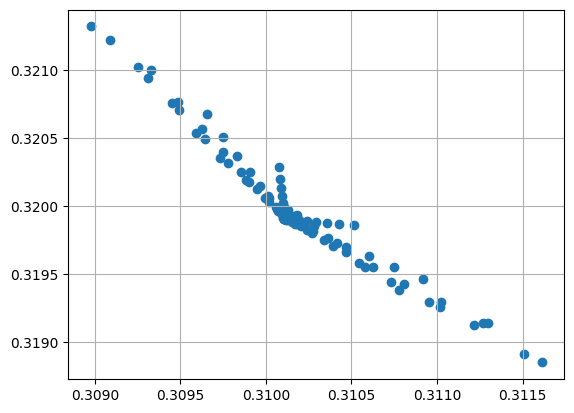

Compiling ContextCpu kernels...


904f1c4d09034dc9bf30703a2e90180e.c:5040: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 904f1c4d09034dc9bf30703a2e90180e.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
904f1c4d09034dc9bf30703a2e90180e.c: In function ‘compt_do’:
904f1c4d09034dc9bf30703a2e90180e.c:18165:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
904f1c4d09034dc9bf30703a2e90180e.c:18162:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
904f1c

Done compiling ContextCpu kernels.
bb_lr.l1b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_20 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_21 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_22 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_23 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_24 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_25 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_20 Ref

3b7aa281710e453dbecf244ef7125445.c:3702: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 3b7aa281710e453dbecf244ef7125445.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


a046ea9c48674598a87e296c9222ce3f.c:7252: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from a046ea9c48674598a87e296c9222ce3f.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 
a046ea9c48674598a87e296c9222ce3f.c: In function ‘compt_do’:
a046ea9c48674598a87e296c9222ce3f.c:10637:12: warning: unused variable ‘e_loss_primary_tot’ [-Wunused-variable]
     double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
            ^~~~~~~~~~~~~~~~~~
a046ea9c48674598a87e296c9222ce3f.c:10634:62: warning: variable ‘ps_e_prime’ set but not used [-Wunused-but-set-variable]
     double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                              ^~~~~~~~~~
a046ea

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Tracking particles for footprint...
Done tracking.
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Done computing footprint.


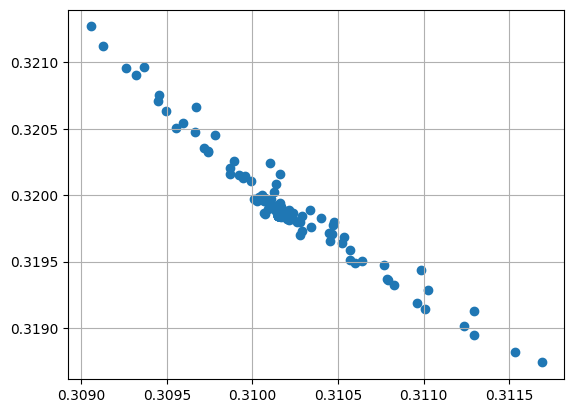

Tracking particles for footprint...
Done tracking.
Done computing footprint.
Tracking particles for footprint...
Done tracking.
Done computing footprint.


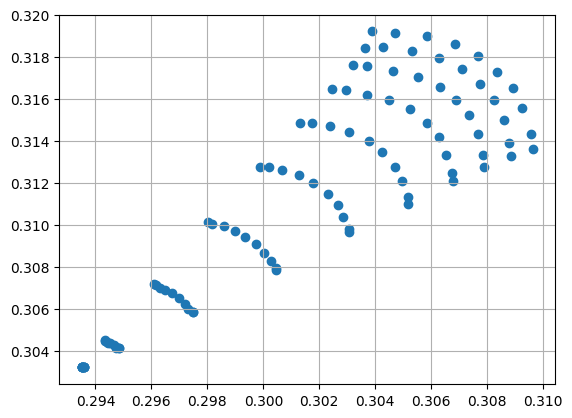

bb_lr.l1b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_20 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_21 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_22 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_23 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_24 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l1b1_25 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_17 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_18 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_19 Reference systems are not parallel
Smaller that 5e-3, tolerated.
bb_lr.l5b1_20 Reference systems are not parallel
Sma

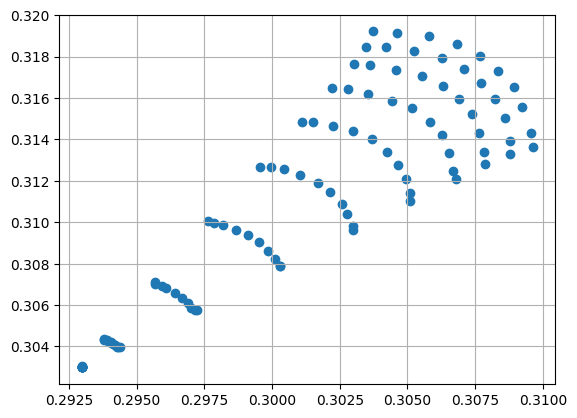

In [27]:
# Function to compute footprint
def return_footprint(collider, emittance, beam="lhcb1", n_turns=2000):
    fp_polar_xm = collider[beam].get_footprint(
        nemitt_x=emittance,
        nemitt_y=emittance,
        n_turns=n_turns,
        linear_rescale_on_knobs=[xt.LinearRescale(knob_name="beambeam_scale", v0=0.0, dv=0.05)],
        freeze_longitudinal=True,
    )

    qx = fp_polar_xm.qx
    qy = fp_polar_xm.qy

    return qx, qy



collider.vars['on_sep1'] = -0.3
collider.vars['on_sep5'] = 0.3
qx, qy = return_footprint(collider, 2e-6, beam="lhcb1", n_turns=500)
plt.scatter(qx, qy)
plt.grid()
plt.show()
plt.close()

# Reconfigure beam-beam
collider = configure_beam_beam(collider, config_bb)
qx, qy = return_footprint(collider, 2e-6, beam="lhcb1", n_turns=500)
plt.scatter(qx, qy)
plt.grid()
plt.show()
plt.close()

# Change knob
collider.vars['on_sep1'] = -0.00
collider.vars['on_sep5'] = 0.00
qx, qy = return_footprint(collider, 2e-6, beam="lhcb1", n_turns=500)
plt.scatter(qx, qy)
plt.grid()
plt.show()
plt.close()

# Reconfigure beam-beam
collider = configure_beam_beam(collider, config_bb)
qx, qy = return_footprint(collider, 2e-6, beam="lhcb1", n_turns=500)
plt.scatter(qx, qy)
plt.grid()
plt.show()
plt.close()
